In [1]:
import pandas as pd
import seaborn as sb

In [2]:
data = pd.read_csv('Movie.csv')

In [3]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### to get number of rows and columns

### Get all the column name of this dataset

In [4]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

### To get the attribute name

In [5]:
data.rename(columns = {'Runtime (Minutes)':'runtime_mins','Revenue (Millions)' : 'revenue_millions'}, inplace = True)

In [6]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'runtime_mins', 'Rating', 'Votes', 'revenue_millions', 'Metascore'],
      dtype='object')

### get all the types of the attributes

In [7]:
data.dtypes

Rank                  int64
Title                object
Genre                object
Description          object
Director             object
Actors               object
Year                  int64
runtime_mins          int64
Rating              float64
Votes                 int64
revenue_millions    float64
Metascore           float64
dtype: object

### check for missing values in the dataset

In [8]:
print("Is there any missing value: ",data.isnull().values.any())

Is there any missing value:  True


In [9]:
data.isnull().sum() # 2 attributes contain missing values in it

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
runtime_mins          0
Rating                0
Votes                 0
revenue_millions    128
Metascore            64
dtype: int64

### Let's visualize the missing value 

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

<AxesSubplot:>

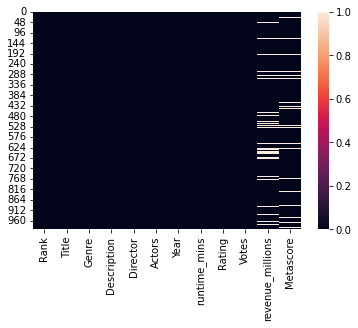

In [11]:
sb.heatmap(data.isnull())

### To get the missing value in percentage

In [12]:
missing_percent = data.isnull().sum() * 100 / len(data)
missing_percent

Rank                 0.0
Title                0.0
Genre                0.0
Description          0.0
Director             0.0
Actors               0.0
Year                 0.0
runtime_mins         0.0
Rating               0.0
Votes                0.0
revenue_millions    12.8
Metascore            6.4
dtype: float64

### to drop the rows which contain missing values

In [13]:
data.dropna(axis = 0, inplace =True)

In [14]:
data.isnull().sum()

Rank                0
Title               0
Genre               0
Description         0
Director            0
Actors              0
Year                0
runtime_mins        0
Rating              0
Votes               0
revenue_millions    0
Metascore           0
dtype: int64

### get the details of any particular movie like(10 th)

In [15]:
data.iloc[0] # this is the 1st movie details

Rank                                                                1
Title                                         Guardians of the Galaxy
Genre                                         Action,Adventure,Sci-Fi
Description         A group of intergalactic criminals are forced ...
Director                                                   James Gunn
Actors              Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
Year                                                             2014
runtime_mins                                                      121
Rating                                                            8.1
Votes                                                          757074
revenue_millions                                               333.13
Metascore                                                        76.0
Name: 0, dtype: object

In [16]:
tenth_movie = data.iloc[9]
print("Details of 10th Movie: ",tenth_movie)

Details of 10th Movie:  Rank                                                               11
Title                         Fantastic Beasts and Where to Find Them
Genre                                        Adventure,Family,Fantasy
Description         The adventures of writer Newt Scamander in New...
Director                                                  David Yates
Actors              Eddie Redmayne, Katherine Waterston, Alison Su...
Year                                                             2016
runtime_mins                                                      133
Rating                                                            7.5
Votes                                                          232072
revenue_millions                                               234.02
Metascore                                                        66.0
Name: 10, dtype: object


### Which movie has earn maximum revenue

In [17]:
data[['Title','revenue_millions']][data['revenue_millions'] == data['revenue_millions'].max()]

,Title,revenue_millions
50,Star Wars: Episode VII - The Force Awakens,936.63


### Which movie has earn minimum revenue

In [18]:
data[['Title','revenue_millions']][data['revenue_millions'] == data['revenue_millions'].min()]

,Title,revenue_millions
231,A Kind of Murder,0.0


### Which all movies release in 2014

In [19]:
d1 = data[['Title','Year']]
result = d1[d1['Year'] == 2014]
result

,Title,Year
0,Guardians of the Galaxy,2014
36,Interstellar,2014
53,John Wick,2014
65,Kingsman: The Secret Service,2014
83,Gone Girl,2014
...,...,...
955,That Awkward Moment,2014
958,3 Days to Kill,2014
981,Annie,2014
983,Let's Be Cops,2014


### to get the movie name which has highest rating

In [20]:
data[['Title','Rating']][data.Rating == data['Rating'].max()]

,Title,Rating
54,The Dark Knight,9.0


### to get the movie name which has lowest rating

In [21]:
data[['Title','Rating']][data.Rating == data['Rating'].min()]

,Title,Rating
829,Disaster Movie,1.9


### To display the movie which has a rating of greater than 8

In [22]:
data = data[data['Rating'] >8 ]
data

,Rank,Title,Genre,Description,Director,Actors,Year,runtime_mins,Rating,Votes,revenue_millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0
74,75,Zootopia,"Animation,Adventure,Comedy","In a city of anthropomorphic animals, a rookie...",Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016,108,8.1,296853,341.26,78.0


### To get the name of the movie which has the higest votes

In [23]:
data[['Title','Votes']][data.Votes == data['Votes'].max()]

,Title,Votes
54,The Dark Knight,1791916


### To get the name of the movie which has the lowest votes

In [24]:
data[['Title','Votes']][data.Votes == data['Votes'].min()]

,Title,Votes
145,Ah-ga-ssi,33418


### To display the name , Genre , year and votes and sort it from high votes to low votes

In [25]:
d4 = data.sort_values(by = 'Votes', ascending = False).head().reset_index()
d4

,index,Rank,Title,Genre,Description,Director,Actors,Year,runtime_mins,Rating,Votes,revenue_millions,Metascore
0,54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
1,80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
2,124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
3,36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
4,76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0


<AxesSubplot:xlabel='Title', ylabel='Votes'>

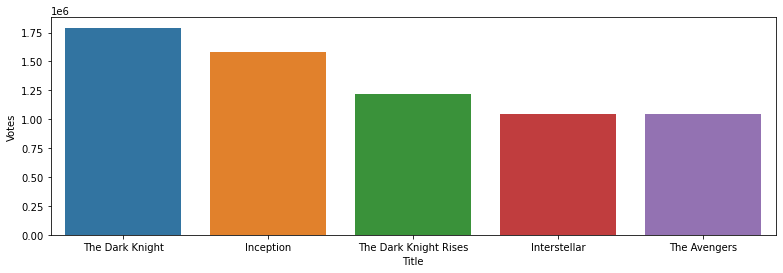

In [26]:
plt.figure(figsize=(13,4))
sb.barplot(x='Title',y='Votes',data=d4)

### To get Which movie duration is the longest one

In [27]:
data[['Title','runtime_mins']][data['runtime_mins'] == data['runtime_mins'].max()]

,Title,runtime_mins
82,The Wolf of Wall Street,180


### To get Which movie duration is the shortest one

In [28]:
data[['Title','runtime_mins']][data['runtime_mins'] == data['runtime_mins'].min()]

,Title,runtime_mins
241,Inside Out,95


In [29]:
data['runtime_mins']

0      121
6      128
16     139
18     118
36     169
50     136
54     152
64     130
67     120
74     108
76     143
77     153
80     148
82     180
83     149
90     153
92     146
96     106
99     151
111    134
114    130
124    164
133    107
136    122
138    138
143    118
144    165
145    144
192    128
194    140
197    148
198    114
230    118
238     99
241     95
249    112
299    158
334    123
427    115
430    170
455    115
476    137
499     96
608    139
641    122
688    103
713    131
742    129
765    153
772     98
991    165
Name: runtime_mins, dtype: int64

### To get a list of movies which will take maximum 1 hr to watch it completely

In [30]:
data['runtime_mins'].unique()

array([121, 128, 139, 118, 169, 136, 152, 130, 120, 108, 143, 153, 148,
       180, 149, 146, 106, 151, 134, 164, 107, 122, 138, 165, 144, 140,
       114,  99,  95, 112, 158, 123, 115, 170, 137,  96, 103, 131, 129,
        98], dtype=int64)

In [31]:
d2 = data[['Title','runtime_mins']]
result_1 = d2[d2['runtime_mins'] <= 60]
result_1

,Title,runtime_mins


### To get a list of movies which will take more than a  hr to watch it completely

In [32]:
d3 = data[['Title','runtime_mins']]
result_2 = d3[d3['runtime_mins'] >= 60]
result_2

,Title,runtime_mins
0,Guardians of the Galaxy,121
6,La La Land,128
16,Hacksaw Ridge,139
18,Lion,118
36,Interstellar,169
50,Star Wars: Episode VII - The Force Awakens,136
54,The Dark Knight,152
64,The Prestige,130
67,Mad Max: Fury Road,120
74,Zootopia,108


### To display all the details which has rating more than 8 and votes more than 1000

In [33]:
d4 = data[(data['Rating'] > 8) & (data['Votes'] > 50000)]
d4

,Rank,Title,Genre,Description,Director,Actors,Year,runtime_mins,Rating,Votes,revenue_millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0
74,75,Zootopia,"Animation,Adventure,Comedy","In a city of anthropomorphic animals, a rookie...",Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016,108,8.1,296853,341.26,78.0


### To display the details of which it's either rating is greater than 9 or metascore is 90

In [34]:
data['Metascore'].unique()

array([76., 93., 71., 69., 74., 81., 82., 66., 90., 78., 75., 79., 62.,
       85., 96., 87., 88., 91., 63., 86., 84., 73., 98., 94., 57., 92.,
       67., 89., 77., 80., 51., 42.])

In [35]:
d5 = data[(data['Rating'] > 8) | (data['Metascore'] > 90)]
d5

,Rank,Title,Genre,Description,Director,Actors,Year,runtime_mins,Rating,Votes,revenue_millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0
74,75,Zootopia,"Animation,Adventure,Comedy","In a city of anthropomorphic animals, a rookie...",Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016,108,8.1,296853,341.26,78.0


### Just adding one new column which will have the count of movie title

In [36]:
data['no_words_title'] = data.apply(lambda x: len(x['Title'].split(" ")) , axis=1)


In [37]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,runtime_mins,Rating,Votes,revenue_millions,Metascore,no_words_title
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,4
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,3
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0,2
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0,1
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,1


In [38]:
d6 = data[data['no_words_title'] >= 5]
d6

,Rank,Title,Genre,Description,Director,Actors,Year,runtime_mins,Rating,Votes,revenue_millions,Metascore,no_words_title
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,8
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0,5
114,115,Harry Potter and the Deathly Hallows: Part 2,"Adventure,Drama,Fantasy","Harry, Ron and Hermione search for Voldemort's...",David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2011,130,8.1,590595,380.96,87.0,8
136,137,No Country for Old Men,"Crime,Drama,Thriller",Violence and mayhem ensue after a hunter stumb...,Ethan Coen,"Tommy Lee Jones, Javier Bardem, Josh Brolin, W...",2007,122,8.1,660286,74.27,91.0,5
742,743,El secreto de sus ojos,"Drama,Mystery,Romance",A retired legal counselor writes a novel hopin...,Juan José Campanella,"Ricardo Darín, Soledad Villamil, Pablo Rago,Ca...",2009,129,8.2,144524,20.17,80.0,5
772,773,How to Train Your Dragon,"Animation,Action,Adventure",A hapless young Viking who aspires to hunt dra...,Dean DeBlois,"Jay Baruchel, Gerard Butler,Christopher Mintz-...",2010,98,8.1,523893,217.39,74.0,5


In [40]:
data['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Comedy,Drama,Music',
       'Biography,Drama,History', 'Biography,Drama',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Fantasy',
       'Action,Crime,Drama', 'Drama,Mystery,Sci-Fi',
       'Animation,Adventure,Comedy', 'Action,Sci-Fi',
       'Adventure,Drama,War', 'Biography,Comedy,Crime',
       'Crime,Drama,Mystery', 'Drama', 'Animation,Drama,Fantasy',
       'Crime,Drama,Thriller', 'Adventure,Drama,Fantasy',
       'Action,Thriller', 'Drama,Music', 'Mystery,Thriller',
       'Drama,Western', 'Drama,Mystery,Romance', 'Crime,Drama,History',
       'Action,Drama,Sport', 'Adventure,Biography,Drama',
       'Biography,Drama,Thriller', 'Drama,Fantasy,War',
       'Adventure,Comedy,Drama', 'Biography,Comedy,Drama',
       'Drama,History', 'Action,Biography,Drama',
       'Action,Mystery,Thriller', 'Comedy,Drama', 'Drama,Thriller',
       'Comedy,Drama,Thriller', 'Drama,Mystery,War',
       'Comedy,Drama,Romance', 'Animation,Action,Adventure',
     

### To display all the Drama based movie 

In [53]:
d7 = data[data['Genre'] == 'Drama']
d7

,Rank,Title,Genre,Description,Director,Actors,Year,runtime_mins,Rating,Votes,revenue_millions,Metascore,no_words_title
92,93,The Help,Drama,An aspiring author during the civil rights mov...,Tate Taylor,"Emma Stone, Viola Davis, Octavia Spencer, Bryc...",2011,146,8.1,342429,169.71,62.0,2
143,144,Room,Drama,A young boy is raised within the confines of a...,Lenny Abrahamson,"Brie Larson, Jacob Tremblay, Sean Bridgers,Wen...",2015,118,8.2,224132,14.68,86.0,1
455,456,Jagten,Drama,"A teacher lives a lonely life, all the while s...",Thomas Vinterberg,"Mads Mikkelsen, Thomas Bo Larsen, Annika Wedde...",2012,115,8.3,192263,0.61,76.0,1
608,609,Mommy,Drama,"A widowed single mother, raising her violent s...",Xavier Dolan,"Anne Dorval, Antoine-Olivier Pilon, Suzanne Cl...",2014,139,8.1,33560,3.49,74.0,1


### To display the top 5 director who has the highest rating

In [49]:
d8 = data.groupby('Director')['Rating'].max()
d8.head()

Director
Aamir Khan           8.5
Byron Howard         8.1
Chan-wook Park       8.1
Christopher Nolan    9.0
Damien Chazelle      8.5
Name: Rating, dtype: float64